In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Generation

 Salary : Applicants with high income can easily get Loan Approval
 Previous History : Applicants who have repaid their previous debts should get high chances of Loan Approval
 Loan Approval: Loan Approval should also depend on the loan amount if amount is less then chances of loan approval should be high
 
 Loan period : Loan for less time period and less amount should have higher chances of loan approval
 
 EMI :
 

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

# Univariate Analysis

## Categorical Features

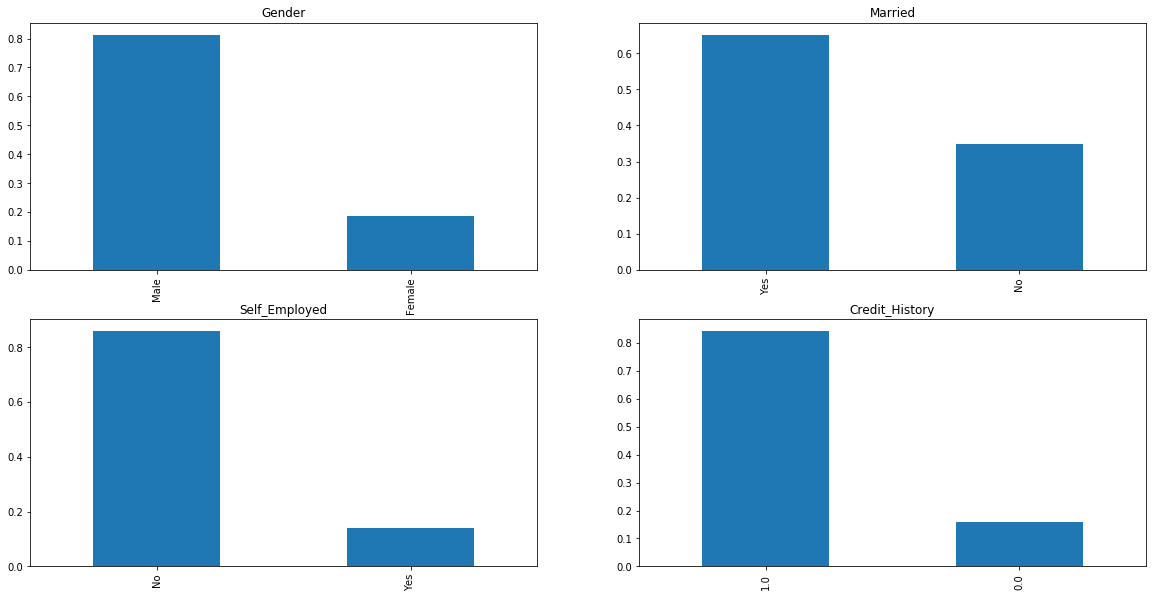

In [6]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

80% applicants in this dataset are Male

around 65% are married

85% are Self employed

almost 85% having a good credit history.

## Ordinal Features

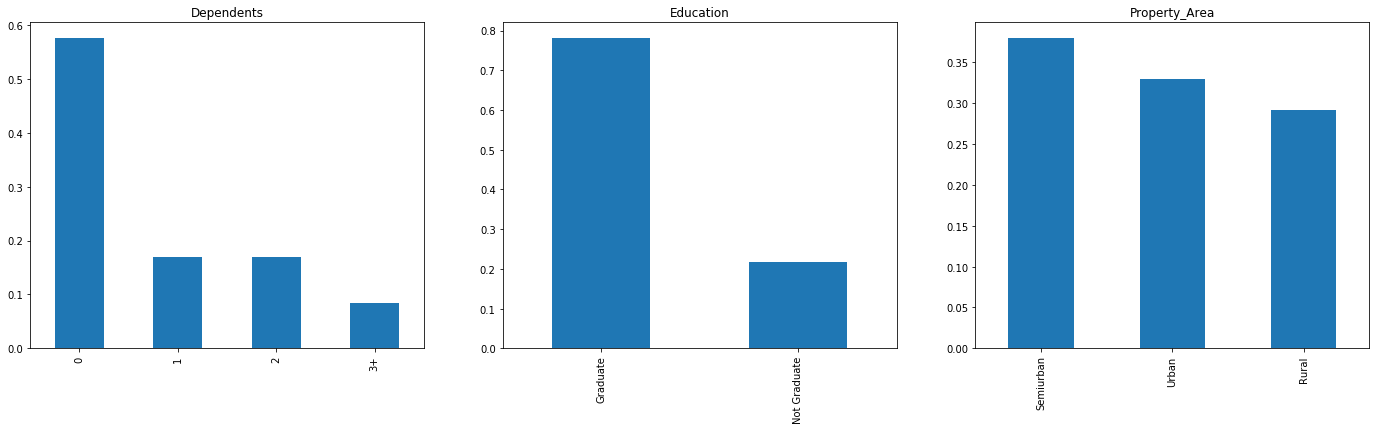

In [7]:
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

 most of the applicants don't have dependent
 
 around 78% applicants are Graduated
 
 most of the applicants are from semiurban areas
 
 

## Numerical Features

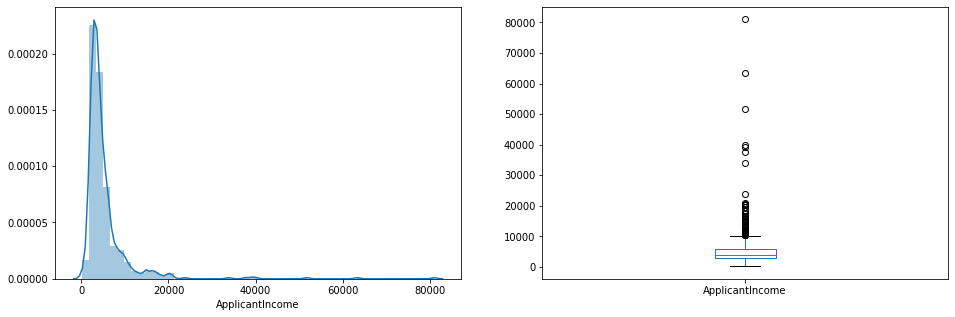

In [8]:
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

we can inferred that the data is not normally distributed and lot of outliers involved

Text(0.5, 0.98, '')

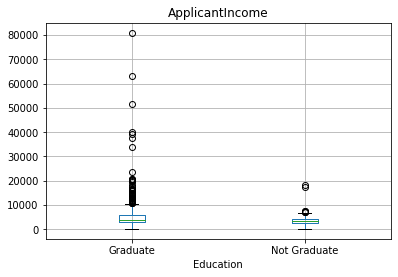

In [9]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

we can see that there is a high number of graduates with higher income which is appearing to be outliers.

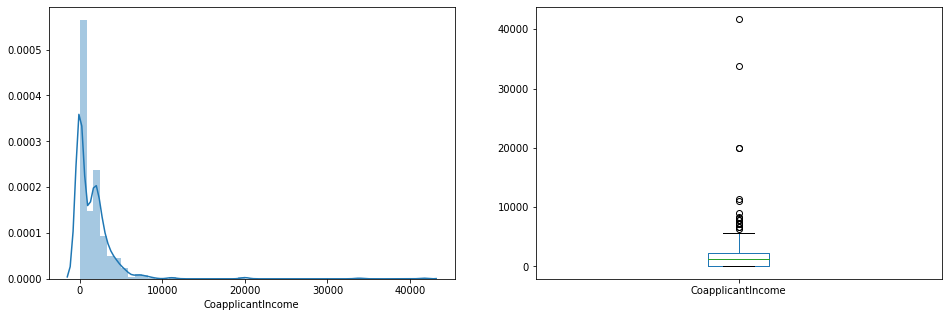

In [10]:
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

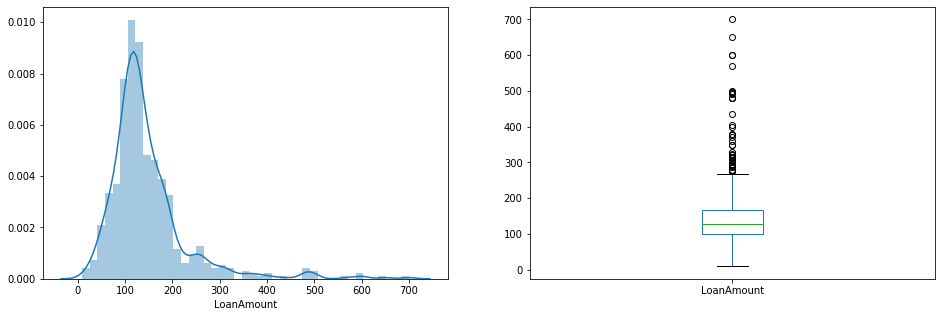

In [11]:
plt.subplot(121) 
sns.distplot(train['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Bivariate Analysis

### Categorical Independent Variable vs Target Variable

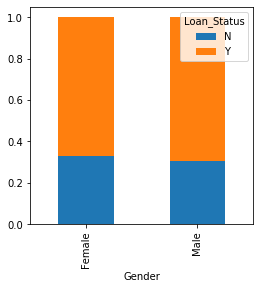

In [12]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

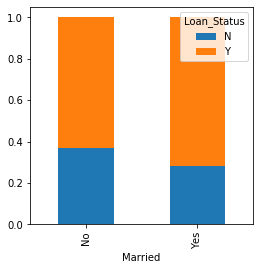

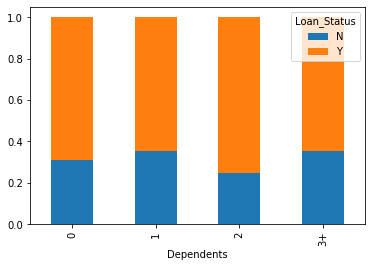

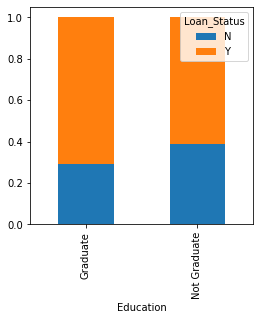

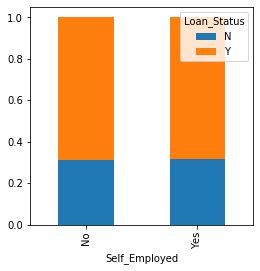

In [13]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

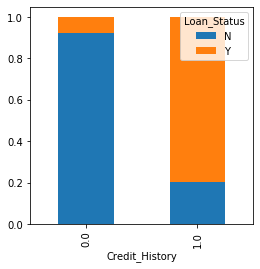

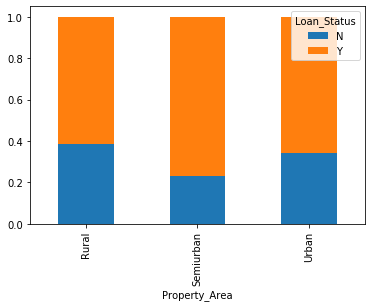

In [14]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

we can see that applicant who is having great credit history got most approval

applicants from Semiurban got most of the approvals as compare to others.

### Numerical Independent Variable vs Target Variable

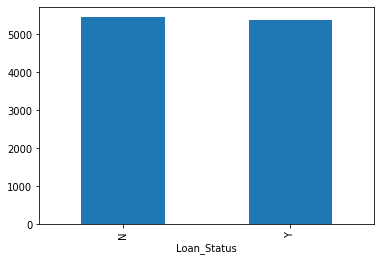

In [15]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income.

Text(0, 0.5, 'Percentage')

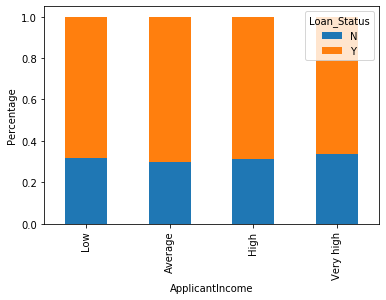

In [16]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')


so it can be iferred that it was a wrong assumption that we clearly mentioned in our Hypothesis report that
if the applicant income is high the chances of loan approval will also be high.

Text(0, 0.5, 'Percentage')

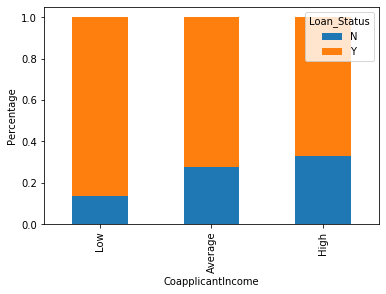

In [17]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')


it shows that applicant who has less Coapplicant Income should have maximum chances of approval but this doesn't look right.

The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.

 So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

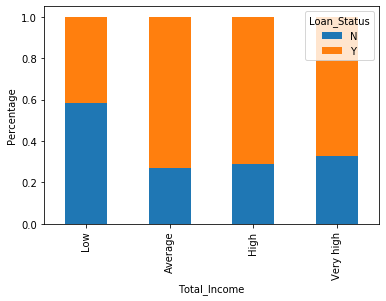

In [18]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Text(0, 0.5, 'Percentage')

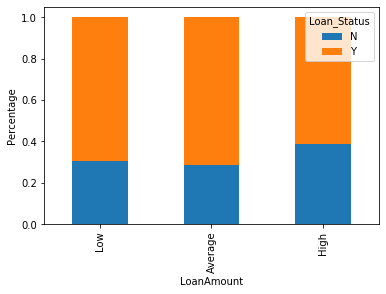

In [19]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

we can see that most of the loan approvals for Low and Average Loan Amount which is we correclty predicted as we mentioned in our hypothisis report

In [20]:
train=train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [21]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

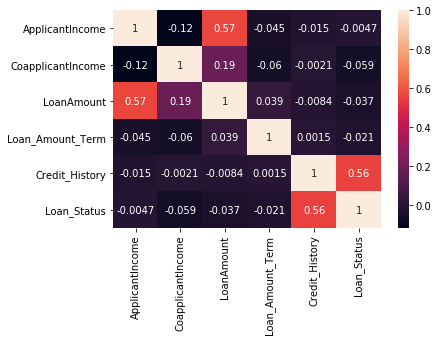

In [22]:
sns.heatmap(train.corr(),annot=True)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [25]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

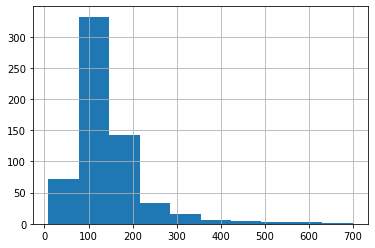

In [26]:
# we saw that there is a lot of outliers in LoanAmount feature
train['LoanAmount'].hist()

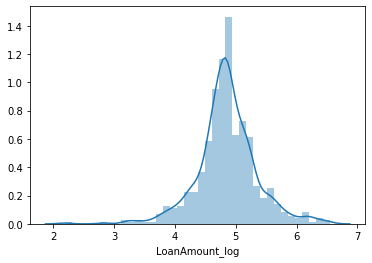

In [27]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
sns.distplot(train['LoanAmount_log'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [28]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [29]:
train['Gender'] = train['Gender'].map({'Female':0,'Male':1})
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype('int')
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1})
train['Property_Area'] = train['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})
# train['Loan_Amount_Term_Year']=train['Loan_Amount_Term']/12



In [30]:
test['Gender'] = test['Gender'].map({'Female':0,'Male':1})
test['Married'] = test['Married'].map({'No':0, 'Yes':1}).astype('int')
test['Education'] = test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1})
test['Property_Area'] = test['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})

# test['Loan_Amount_Term_Year']=test['Loan_Amount_Term']/12


In [31]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [32]:
df_train=train.copy()
df_test=test.copy()

In [33]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term']
df_train['Balance Income']=df_train['Total_Income']-(df_train['EMI']*1000) # Multiply with 1000 to make the units equal

In [55]:
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test['EMI']=df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_test['Balance Income']=df_test['Total_Income']-(df_test['EMI']*1000)

In [34]:
df_train['Total_Income']=np.log(df_train['Total_Income'])

In [57]:
df_test['Total_Income']=np.log(df_test['Total_Income'])

In [35]:
df_train['Dependents']=df_train['Dependents'].astype('int')

In [58]:
df_test['Dependents']=df_test['Dependents'].astype('int')

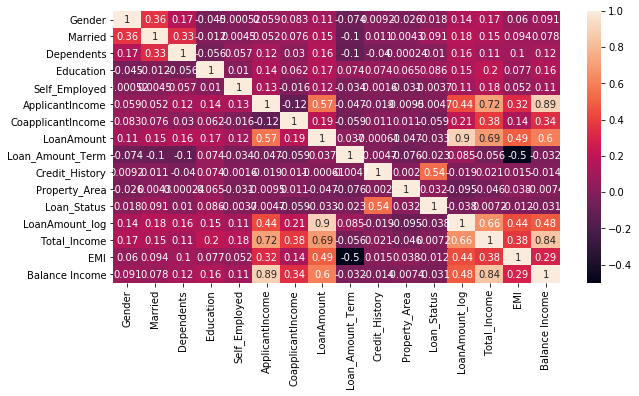

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)

In [37]:
df_train=df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [59]:
df_test=df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [39]:
X=df_train.drop('Loan_Status',axis=1)
y=df_train.Loan_Status

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [284]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection

In [283]:
MLA=[
    # Ensemble Techniques
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    #Linear models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.PassiveAggressiveClassifier(),
    
     #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
     
    #Xgboost
    XGBClassifier()
    
]


In [321]:
# train_test split by model_selection
cv=model_selection.ShuffleSplit(n_splits=10,test_size=0.2,train_size=0.7,random_state=0)

# lets create a table to compare algotihm parameters
MLA_columns=['MLA Name','MLA Parameters','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']

MLA_table=pd.DataFrame(columns=MLA_columns)

# create a table for compare Predictions
MLA_predict=train['Loan_Status'].copy(deep=True)

# lets add model perfoamnce through rows.
row_index=0
for alg in MLA:
    
    #set name and Parameters of algorithms.
    MLA_name=alg.__class__.__name__
    MLA_table.loc[row_index,'MLA Name']=MLA_name
    MLA_table.loc[row_index,'MLA Parameters']=str(alg.get_params())
    
    # cross_validation
    cv_results=model_selection.cross_validate(alg,scale_x,train['Loan_Status'],cv=cv)
    
#     MLA_table.loc[row_index,'MLA Train Accuracy Mean']=cv_results['train_score'].mean()
    MLA_table.loc[row_index,'MLA Test Accuracy Mean']=cv_results['test_score'].mean()
    MLA_table.loc[row_index,'MLA Time']=cv_results['fit_time'].mean()
    MLA_table.loc[row_index,'MLA Test Accuracy 3*STD']=cv_results['test_score'].std()*3
    
    alg.fit(scale_x,train['Loan_Status'])
    MLA_predict[MLA_name]=alg.predict(scale_x)
    
    row_index+=1
    
MLA_table.sort_values(by=['MLA Test Accuracy Mean'],ascending=False,inplace=True)
    

In [322]:
MLA_table

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
9,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.815702,0.0887382,0.00177133
14,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.814876,0.0867414,0.0147101
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.814876,0.0867414,0.318852
7,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.814876,0.0867414,0.00390303
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.81405,0.0860656,0.491869
13,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.81405,0.0860656,0.0749523
12,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.81405,0.0860656,0.0705487
10,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.807438,0.104044,0.00190132
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.795868,0.1081,0.700278
11,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.790909,0.109793,0.00300174


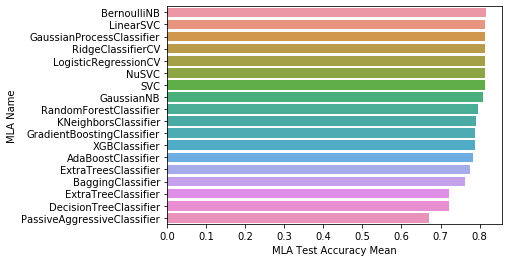

In [323]:
sns.barplot(MLA_table['MLA Test Accuracy Mean'],MLA_table['MLA Name'])

In [46]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


In [47]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
reg=RandomForestClassifier(n_estimators=1300, 
                           min_samples_split= 2,
                           min_samples_leaf= 1, 
                           max_features='sqrt', max_depth= 9)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy :',accuracy)
print('train score :',reg.score(X_train,y_train))
print('test score :',reg.score(X_test,y_test))
print('Confusion_Matrix\n :',matrix)

print('Classification_report :',report)
print('F1_Score',f1_score(y_test,y_pred))

Accuracy : 0.8130081300813008
train score : 0.9124236252545825
test score : 0.8130081300813008
Confusion_Matrix
 : [[14 19]
 [ 4 86]]
Classification_report :               precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123

F1_Score 0.8820512820512821


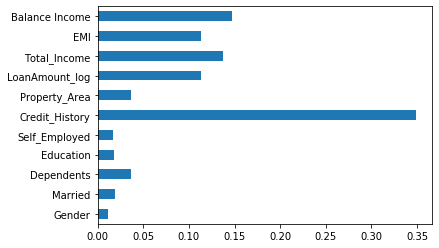

In [48]:
FI=pd.Series(reg.feature_importances_,index=X.columns)
FI.plot(kind='barh')

In [269]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy :',accuracy)
print('train score :',naive.score(X_train,y_train))
print('test score :',naive.score(X_test,y_test))
print('Confusion_Matrix\n :',matrix)

print('Classification_report :',report)

Accuracy : 0.8292682926829268
train score : 0.7963340122199593
test score : 0.8292682926829268
Confusion_Matrix
 : [[15 18]
 [ 3 87]]
Classification_report :               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



In [325]:
lsvc=svm.LinearSVC()
lsvc.fit(X_train,y_train)
y_pred=lsvc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy :',accuracy)
print('train score :',lsvc.score(X_train,y_train))
print('test score :',lsvc.score(X_test,y_test))
print('Confusion_Matrix\n :',matrix)

print('Classification_report :',report)


Accuracy : 0.8347107438016529
train score : 0.8112033195020747
test score : 0.8347107438016529
Confusion_Matrix
 : [[14 18]
 [ 2 87]]
Classification_report :               precision    recall  f1-score   support

           0       0.88      0.44      0.58        32
           1       0.83      0.98      0.90        89

    accuracy                           0.83       121
   macro avg       0.85      0.71      0.74       121
weighted avg       0.84      0.83      0.81       121



In [281]:
from sklearn.neighbors import KNeighborsClassifier
sgd=KNeighborsClassifier(n_neighbors=8)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy :',accuracy)
print('train score :',sgd.score(X_train,y_train))
print('test score :',sgd.score(X_test,y_test))
print('Confusion_Matrix\n :',matrix)

print('Classification_report :',report)

Accuracy : 0.8048780487804879
train score : 0.8167006109979633
test score : 0.8048780487804879
Confusion_Matrix
 : [[16 17]
 [ 7 83]]
Classification_report :               precision    recall  f1-score   support

           0       0.70      0.48      0.57        33
           1       0.83      0.92      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.70      0.72       123
weighted avg       0.79      0.80      0.79       123



In [51]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy :',accuracy)
print('train score :',nb.score(X_train,y_train))
print('test score :',nb.score(X_test,y_test))
print('Confusion_Matrix\n :',matrix)

print('Classification_report :\n',report)


Accuracy : 0.8292682926829268
train score : 0.8065173116089613
test score : 0.8292682926829268
Confusion_Matrix
 : [[14 19]
 [ 2 88]]
Classification_report :
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [60]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
nb=BernoulliNB()
nb.fit(X,y)
y_pred=nb.predict(df_test)


In [61]:
y_pred=['Y' if x>0 else 'N' for x in y_pred]

In [62]:
submission=pd.read_csv('sample_submission.csv')

In [63]:
submission1=pd.DataFrame(columns=['Loan_ID','Loan_Status'])
submission1['Loan_ID']=submission['Loan_ID']
submission1['Loan_Status']=y_pred

In [64]:
submission1.to_csv('submission3.csv',index=False)

In [53]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4.605170
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,4.727388
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,4.744932
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,4.836282
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,5.062595


In [54]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,EMI,Balance Income
0,1,0,0,1,0,1.0,2,4.852030,8.674026,0.355556,5493.444444
1,1,1,1,1,0,1.0,0,4.852030,8.714568,0.355556,5735.444444
2,1,1,0,1,1,1.0,2,4.189655,8.006368,0.183333,2816.666667
3,1,1,0,0,0,1.0,2,4.787492,8.505323,0.333333,4607.666667
4,1,0,0,1,0,1.0,2,4.948760,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,1.0,0,4.262680,7.972466,0.197222,2702.777778
610,1,1,3,1,0,1.0,0,3.688879,8.320205,0.222222,3883.777778
611,1,1,1,1,0,1.0,2,5.533389,9.025456,0.702778,7609.222222
612,1,1,2,1,0,1.0,2,5.231109,8.933664,0.519444,7063.555556
